In [3]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.datasets import load_boston

boston = load_boston()
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
dfX = pd.DataFrame(boston.data, columns=boston.feature_names)
dfy = pd.DataFrame(boston.target, columns=["MEDV"])
df = pd.concat([dfX, dfy], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [7]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Q1. 원하는 변수를 가지고 'MEDV' 예측하는 모델 만들기

In [ ]:
# 원하는 변수를 합리적으로 뽑으셔서 하시면 됩니다.

## Q2. Data pre-processing 등을 활용하여 앞의 모델보다 성능 높이기(MSE 기준), 왜 성능이 높아졌는지 2줄 이상 서술

In [12]:
#1. 7:3 train test split
features = df.columns.drop('MEDV')
X = df.loc[:,features]
y = df.loc[:, ['MEDV']] 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [13]:
from sklearn.metrics import r2_score
def R_squad_adj(model, X, y):
    r2 = model.score(X,y)
    N, p = X.shape
    return 1-(1-r2)*(N-1)/(N-p-1)
    

In [20]:
# 2. Feature selection
# !pip install mlxtend
# downloaded package 
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression

sfs = SFS(LinearRegression(),
           k_features="parsimonious", forward=True, floating=False, scoring = R_squad_adj, cv = 5)

sfs.fit(X_train,y_train)

SequentialFeatureSelector(estimator=LinearRegression(),
                          k_features='parsimonious',
                          scoring=<function R_squad_adj at 0x0000012080316B80>)

In [21]:
# print feature selection results
results = pd.DataFrame(sfs.get_metric_dict()).T
results.head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(12,)","[0.5214922468726411, 0.5820855247740244, 0.451...",0.529975,"(LSTAT,)",0.0569662,0.0443216,0.0221608
2,"(5, 12)","[0.6511575433479074, 0.6824902382430347, 0.500...",0.619271,"(RM, LSTAT)",0.0901899,0.0701708,0.0350854
3,"(5, 10, 12)","[0.6875075328724884, 0.7231450394693661, 0.574...",0.658994,"(RM, PTRATIO, LSTAT)",0.0808516,0.0629053,0.0314527
4,"(5, 7, 10, 12)","[0.7306127869329675, 0.7285428031312469, 0.576...",0.674406,"(RM, DIS, PTRATIO, LSTAT)",0.0827459,0.0643791,0.0321896
5,"(4, 5, 7, 10, 12)","[0.7615309307695006, 0.7370580890059215, 0.587...",0.684173,"(NOX, RM, DIS, PTRATIO, LSTAT)",0.0884168,0.0687913,0.0343957


In [22]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

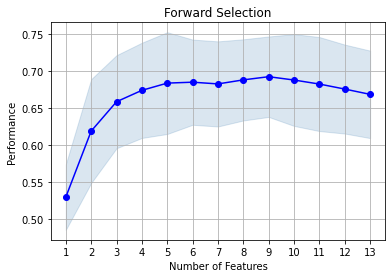

In [23]:
fig = plot_sfs(sfs.get_metric_dict())
plt.title('Forward Selection')
plt.grid()
plt.show()

In [24]:
features_to_use = list(sfs.k_feature_names_)
print('Selected features are')
print(features_to_use)

Selected features are
['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']


In [25]:
# 3. make a model accordingly
rl = LinearRegression()
rl.fit(X_train[(features_to_use)],y_train)

LinearRegression()

In [26]:
# display the results
from sklearn.metrics import mean_squared_error

def print_summary(model, X, y, features, plot= False):
    s = pd.DataFrame({'coefficients':model.coef_.flatten()})
    s.index = features
    print(s)
    print()
    if plot:
        s.plot(kind= 'barh')
        plt.show()
    
    print(f'절편: {model.intercept_.item():.4f}')
    print(f'R^2: {model.score(X[features],y).item():.4f}')
    y_hat = model.predict(X[features])
    print(f'MSE: {mean_squared_error(y_hat,y):.4f}')

         coefficients
NOX        -16.252379
RM           3.739484
DIS         -1.431803
PTRATIO     -1.121513
LSTAT       -0.675865



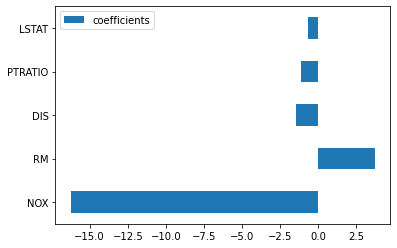

절편: 43.0044
R^2: 0.7170
MSE: 27.4386


In [27]:
# how well the model is fitted
print_summary(rl, X_train, y_train, features= features_to_use, plot=True)

In [28]:
# how well the model is generalized
print_summary(rl, X_test, y_test, features= features_to_use, plot=False)

         coefficients
NOX        -16.252379
RM           3.739484
DIS         -1.431803
PTRATIO     -1.121513
LSTAT       -0.675865

절편: 43.0044
R^2: 0.6352
MSE: 19.6581


## 참고사항

#### coefficient 에 대한 해석:   
(1) 주택당 방 수 1 단위 증가 당 주택 가격 4.72 증가   
(2) 학생/교사 비율 한 단위 증가 당 주택 가격 0.84 감소   
(3) 인구 중 하위 계층 비율 한 단위 증가 당 주택 가격 0.64 감소   

|특징 데이터||
|------|---|
|CRIM|범죄율|
|INDUS|비소매상업지역 면적 비율|
|NOX|일산화질소 농도|
|__RM__|주택당 방 수|
|__LSTAT__|인구 중 하위 계층 비율|
|B|인구 중 흑인 비율|
|__PTRAT__|학생/교사 비율|
|ZN|25,000 평방피트를 초과 거주지역 비율|
|CHAS|찰스강의 경계에 위치한 경우는 1, 아니면 0|
|AGE|1940년 이전에 건축된 주택의 비율|
|RAD|방사형 고속도로까지의 거리|
|DIS|직업센터의 거리|
|TAX|재산세율|

#### ISSUE
(1) 위에서 구한 coefficient에 대한 해석에 동의하시나요?

(2) 주택당 방 수, 인구 중 하위 계층 비율, 학생/교사 비율만을 사용해서 Boston 집값을 예측하는 모델을 만들게 됐습니다. 합리적인가요?

---

## 전처리 파이프 라인 (참고사항)  
전처리 파이프 라인에 사용할 수 있는 방법은 여러 가지가 있지만 data normalization 만 살펴 보도록 하겠습니다.

In [29]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


#### 데이터 전처리
data normalization을 할 때 사용하는 평균과 분산이 학습 데이터 셋으로 부터 나온 값들이어야 하므로 학습 데이터와 테스트 데이터에 대해 전처리 파이프 라인을 따로 작성합니다.

In [30]:
# There are many other choices, but let me try data normalization 
# define a pipeline 
def normalize(data):
    df = data.copy()
    cache = df.mean(), df.std()
    df = (df-cache[0])/cache[1]
    return df, cache
    
def normalize_test(data, cache):
    df = data.copy()
    df = (df-cache[0])/cache[1]
    return df

def pipeLine(data, target= 'MEDV'):
    df = data.copy()
    features = df.columns.drop('MEDV')
    
    # numeric data preprocessing
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_num = df[features].select_dtypes(include=numerics)
    df_num, cache = normalize(df_num)
    
    # 종속 변수 전처리
    response = df['MEDV']
        
    return df_num, response ,cache

def pipeLine_test(data, cache ,target= 'MEDV'):
    df = data.copy()
    features = df.columns.drop('MEDV')
    
    # numeric data preprocessing
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    df_num = df[features].select_dtypes(include=numerics)
    df_num = normalize_test(df_num, cache)
    
    # 종속 변수 전처리
    response = df['MEDV']
        
    return df_num, response

In [31]:
# train_test split and preprocessing for the training data
X_train_1, y_train_1, cache = pipeLine(pd.concat((X_train, y_train),axis=1))

In [32]:
# train_test split and preprocessing for test data
X_test_1, y_test_1 = pipeLine_test(pd.concat((X_test, y_test),axis=1), cache)

### Feature selection을 해보겠습니다.

In [33]:
sfs = SFS(LinearRegression(),
           k_features="parsimonious", forward=True, floating=False, scoring = R_squad_adj, cv = 5)

sfs.fit(X_train_1,y_train_1)

SequentialFeatureSelector(estimator=LinearRegression(),
                          k_features='parsimonious',
                          scoring=<function R_squad_adj at 0x0000012080316B80>)

In [34]:
# print feature selection results
results = pd.DataFrame(sfs.get_metric_dict()).T
results.head()

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(12,)","[0.5214922468726411, 0.5820855247740242, 0.451...",0.529975,"(LSTAT,)",0.0569662,0.0443216,0.0221608
2,"(5, 12)","[0.6511575433479074, 0.6824902382430345, 0.500...",0.619271,"(RM, LSTAT)",0.0901899,0.0701708,0.0350854
3,"(5, 10, 12)","[0.6875075328724884, 0.7231450394693661, 0.574...",0.658994,"(RM, PTRATIO, LSTAT)",0.0808516,0.0629053,0.0314527
4,"(5, 7, 10, 12)","[0.7306127869329675, 0.7285428031312465, 0.576...",0.674406,"(RM, DIS, PTRATIO, LSTAT)",0.0827459,0.0643791,0.0321896
5,"(4, 5, 7, 10, 12)","[0.7615309307695007, 0.7370580890059215, 0.587...",0.684173,"(NOX, RM, DIS, PTRATIO, LSTAT)",0.0884168,0.0687913,0.0343957


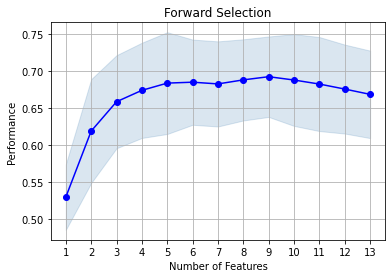

In [35]:
fig = plot_sfs(sfs.get_metric_dict())
plt.title('Forward Selection')
plt.grid()
plt.show()

In [36]:
features_to_use = list(sfs.k_feature_names_)
print('Selected features are')
print(features_to_use)

Selected features are
['NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT']


In [37]:
# 3. make a model accordingly
rl = LinearRegression()
rl.fit(X_train_1[(features_to_use)],y_train_1)

LinearRegression()

         coefficients
NOX         -1.924649
RM           2.788416
DIS         -2.959857
PTRATIO     -2.464733
LSTAT       -4.979092



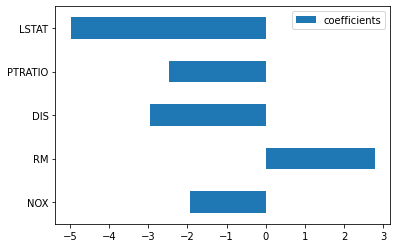

절편: 22.9438
R^2: 0.7170
MSE: 27.4386


In [38]:
# how well the model is fitted
print_summary(rl, X_train_1, y_train_1, features= features_to_use, plot=True)

         coefficients
NOX         -1.924649
RM           2.788416
DIS         -2.959857
PTRATIO     -2.464733
LSTAT       -4.979092



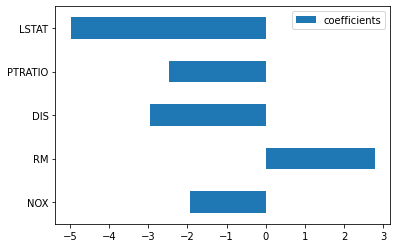

절편: 22.9438
R^2: 0.6352
MSE: 19.6581


In [39]:
print_summary(rl, X_test_1, y_test_1, features= features_to_use, plot=True)

## 잔차 분석  (참고사항)

In [2]:
!pip install yellowbrick

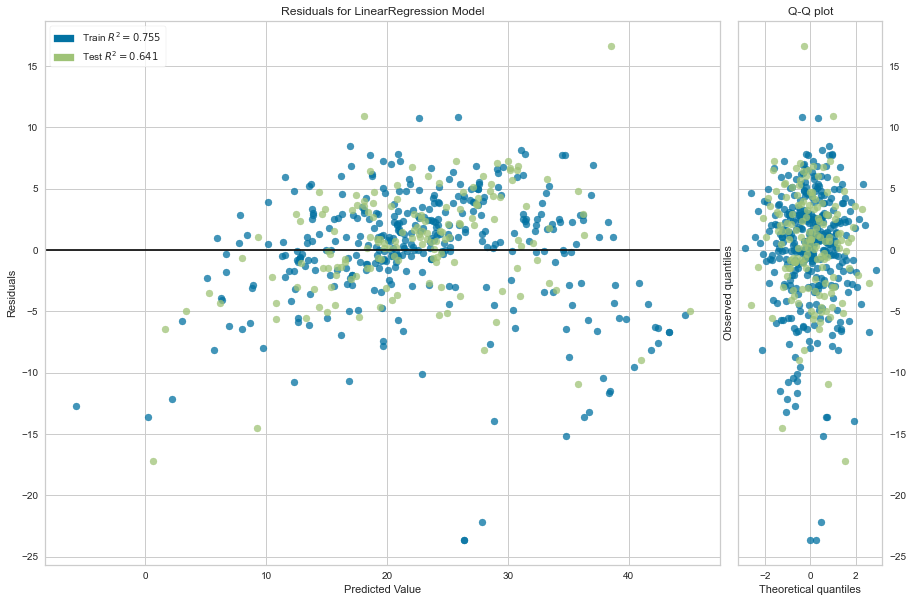

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [45]:
import matplotlib.pyplot as plt
from yellowbrick.regressor import ResidualsPlot
fig, ax = plt.subplots(figsize=(15,10))
visualizer = ResidualsPlot(LinearRegression(), hist=False, qqplot=True,ax = ax)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

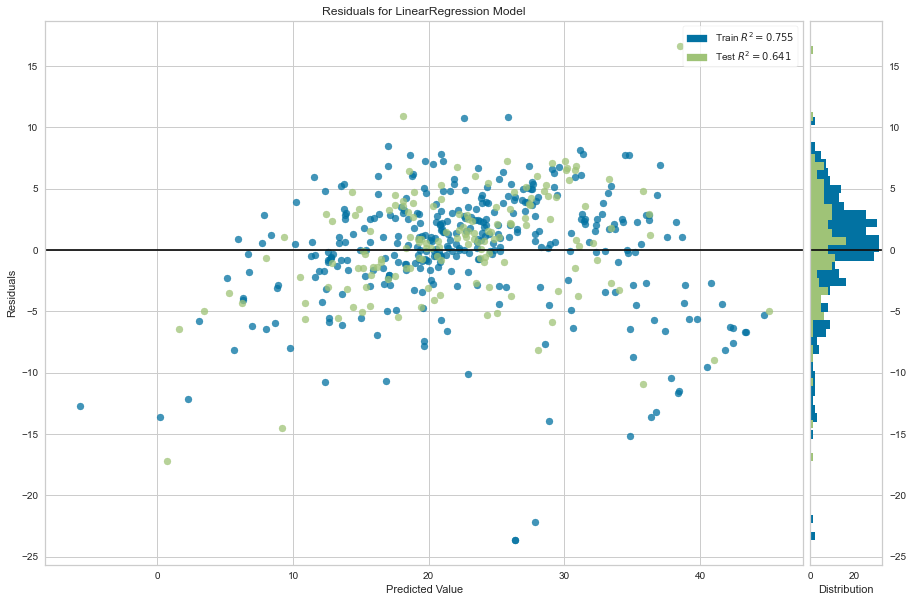

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [46]:
fig, ax = plt.subplots(figsize=(15,10))
visualizer = ResidualsPlot(LinearRegression(), hist=True, qqplot=False,ax = ax)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

## 잔차 분석 결과   
다소 주관적이지만.   
(1) 잔차의 등분산성: 전반적으로 크게 위배되진 않아 보입니다.     
(2) 잔차의 정규성: Q-Q plot으로부터 잔차의 정규성이 만족하지 않았음을 알 수 있습니다.      
(3) 잔차의 독립성: (생략)  

### 특정한 정답은 없으며, 문제가 원하는 답변에 충족하면 만점 처리

[참고자료]   
https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python  
https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard